# Importing the Data 

In [10]:
import sqlite3
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
# Connect to SQLite and create an empty database. 
conn = sqlite3.connect('salary_survey_22.db')

In [12]:
# Create a cursor object for executing queries and fetching the results.
cur = conn.cursor()

In [13]:
# Write a query to create a table and specify each column name 
# and the type of data it will hold. 

cur.execute("""
                CREATE TABLE IF NOT EXISTS salary_survey_2022(
                timestamp NUMERIC, 
                age TEXT,
                employer_industry_standardized TEXT, 
                functional_area_job TEXT, 
                job_title TEXT,
                salary REAL, 
                additional_compensation REAL, 
                currency TEXT, 
                country TEXT, 
                state TEXT, 
                city TEXT, 
                remote_or_onsite TEXT, 
                yrs_experience TEXT, 
                yrs_in_field TEXT, 
                education TEXT, 
                gender TEXT, 
                race TEXT
                )
""")

# Commit query to the database.
conn.commit()

In [14]:
# Open csv file and return it as a file object.
file = open('Salary Survey 2022 v2.csv')

In [15]:
# Read the contents of the csv file.
contents = csv.reader(file)

In [16]:
# Create a query for inserting the contents of the csv file into the database table.
insert_records = "INSERT INTO salary_survey_2022 (timestamp, age, employer_industry_standardized, functional_area_job, job_title, salary, additional_compensation, currency, country, state, city, remote_or_onsite, yrs_experience, yrs_in_field, education, gender, race) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"

In [17]:
# Execute the query for inserting the contents of the csv file into the database table.
# Specify which columns of the csv file to insert. 
cur.executemany(insert_records, ((col[0], col[1], col[3], col[4], col[5], col[7], col[8], col[9], col[12], col[13], col[14], col[15], col[16], col[17], col[18], col[19], col[20]) for col in contents))

In [18]:
# Create a query to select all the records from newly created table. 
select_all = "SELECT * FROM salary_survey_2022"

In [30]:
# Transform table into a pandas dataframe. 
df = pd.read_sql_query("SELECT * FROM salary_survey_2022", conn)
df

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
1,4/5/2022 11:37:42,45-54,"Accounting, Banking & Finance",Computing or Tech,Senior Integration Manager,"56,500","4,000",USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
2,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),"35,500",0.0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
3,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,"85,000",,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
4,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,"114,000",,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,4/6/2022 14:31:54,25-34,,Publishing,Production controller,,,,,,,,,,,,
15276,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15277,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15278,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,


# Analysis

## Data Quality Check

1. Drop the first row that is duplicating the column names. 

In [31]:
df = df.drop(0)
df

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
1,4/5/2022 11:37:42,45-54,"Accounting, Banking & Finance",Computing or Tech,Senior Integration Manager,"56,500","4,000",USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
2,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),"35,500",0.0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
3,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,"85,000",,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
4,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,"114,000",,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
5,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,"41,000",0.0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,4/6/2022 14:31:54,25-34,,Publishing,Production controller,,,,,,,,,,,,
15276,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15277,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15278,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,


2. Capitalize all column names.

In [32]:
df.columns = df.columns.str.capitalize()
df.tail(5)

,Timestamp,Age,Employer_industry_standardized,Functional_area_job,Job_title,Salary,Additional_compensation,Currency,Country,State,City,Remote_or_onsite,Yrs_experience,Yrs_in_field,Education,Gender,Race
15275,4/6/2022 14:31:54,25-34,,Publishing,Production controller,,,,,,,,,,,,
15276,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15277,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15278,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,
15279,10/12/2022 9:20:07,25-34,,Nonprofits,Content manager,,,,,,,,,,,,


3. Sort the dataframe by 'Timestamp' column. 

In [33]:
# Change data type to datetime. 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [34]:
df = df.sort_values(by = 'Timestamp', ascending = False)
df.head(5)

,Timestamp,Age,Employer_industry_standardized,Functional_area_job,Job_title,Salary,Additional_compensation,Currency,Country,State,City,Remote_or_onsite,Yrs_experience,Yrs_in_field,Education,Gender,Race
14643,2023-01-30 19:14:18,25-34,Science,Science,Senior Scientist 1,75000.0,8000.0,USD,United States,North Carolina,Durham,On-site,5-7 years,5-7 years,College degree,Woman,White
14642,2023-01-30 19:12:48,25-34,Science,Science,Lab Assistant II - Accessioning,52000.0,2080.0,USD,United States,North Carolina,Durham,On-site,2-4 years,2-4 years,College degree,Man,Asian or Asian American
6026,2023-01-26 20:13:49,25-34,Education (Primary/Secondary),Education (Primary/Secondary),1st grade teacher,37000.0,,USD,United States,West Virginia,Clarksburg,On-site,2-4 years,2-4 years,College degree,Woman,White
15152,2023-01-25 18:44:51,25-34,Utilities & Telecommunications,Engineering or Manufacturing,Senior Operations Analyst,110000.0,10000.0,USD,United States,Oregon,Portland,Hybrid,8-10 years,8-10 years,College degree,Woman,White
1154,2023-01-24 15:32:05,25-34,Food and Beverage,"Marketing, Advertising & PR",Digital Marketing Coordinator,50000.0,100000.0,USD,United States,California,Napa,Hybrid,5-7 years,1 year or less,Some college,Woman,Asian or Asian American


4. Reset the index back to 0.

In [35]:
df = df.reset_index(drop=True)
df.head(5)

,Timestamp,Age,Employer_industry_standardized,Functional_area_job,Job_title,Salary,Additional_compensation,Currency,Country,State,City,Remote_or_onsite,Yrs_experience,Yrs_in_field,Education,Gender,Race
0,2023-01-30 19:14:18,25-34,Science,Science,Senior Scientist 1,75000.0,8000.0,USD,United States,North Carolina,Durham,On-site,5-7 years,5-7 years,College degree,Woman,White
1,2023-01-30 19:12:48,25-34,Science,Science,Lab Assistant II - Accessioning,52000.0,2080.0,USD,United States,North Carolina,Durham,On-site,2-4 years,2-4 years,College degree,Man,Asian or Asian American
2,2023-01-26 20:13:49,25-34,Education (Primary/Secondary),Education (Primary/Secondary),1st grade teacher,37000.0,,USD,United States,West Virginia,Clarksburg,On-site,2-4 years,2-4 years,College degree,Woman,White
3,2023-01-25 18:44:51,25-34,Utilities & Telecommunications,Engineering or Manufacturing,Senior Operations Analyst,110000.0,10000.0,USD,United States,Oregon,Portland,Hybrid,8-10 years,8-10 years,College degree,Woman,White
4,2023-01-24 15:32:05,25-34,Food and Beverage,"Marketing, Advertising & PR",Digital Marketing Coordinator,50000.0,100000.0,USD,United States,California,Napa,Hybrid,5-7 years,1 year or less,Some college,Woman,Asian or Asian American


5. Remove all commas from 'Salary' column and convert column to numeric data type.

In [36]:
df['Salary'] = df['Salary'].replace(',','', regex=True)
df['Salary'] = pd.to_numeric(df['Salary'])

6. Remove all commas from 'Additional_compensation' column and convert column to numeric data type.

In [37]:
df['Additional_compensation'] = df['Additional_compensation'].replace(',','', regex=True)
df['Additional_compensation'] = pd.to_numeric(df['Additional_compensation'])

7. Replace all NaN or blank values with 'Unknown'. 

In [18]:
df = df.fillna('Unknown')
df = df.replace('', 'Unknown', regex=True)

8. Replace all unknown values with 0 for salary and additional compensation.

In [38]:
df['Salary'] = df['Salary'].replace('Unknown', 0, regex=True)
df['Additional_compensation'] = df['Additional_compensation'].replace('Unknown', 0, regex = True)

# Check that both columns are float data types.
df.dtypes

Timestamp                         datetime64[ns]
Age                                       object
Employer_industry_standardized            object
Functional_area_job                       object
Job_title                                 object
Salary                                   float64
Additional_compensation                  float64
Currency                                  object
Country                                   object
State                                     object
City                                      object
Remote_or_onsite                          object
Yrs_experience                            object
Yrs_in_field                              object
Education                                 object
Gender                                    object
Race                                      object
dtype: object

## Create CSV  Files

In [39]:
# Add column for total compensation.
df['Total_compensation'] = df['Salary'] + df['Additional_compensation']

In [64]:
# Get the total number of participants, minimum salary and maximum salary by employer industry.
df2 = df.groupby('Employer_industry_standardized').agg(Total_participants = ('Total_compensation','count'), Minimum_salary = ('Total_compensation', 'min'), Maximum_salary = ('Total_compensation', 'max'))
df2

,Total_participants,Minimum_salary,Maximum_salary
Employer_industry_standardized,,,
,0,NaN,NaN
"Accounting, Banking & Finance",742,4950.0,1300000.0
Agriculture or Forestry,66,127.0,297000.0
Art & Design,87,1100.0,430200.0
Business or Consulting,369,10118.0,1150000.0
Co,1,114000.0,114000.0
Computing or Tech,1463,55.0,8640000.0
Education (Higher Education),1375,42.0,1250000.0
Education (Primary/Secondary),380,18.0,41700000.0


In [65]:
# Sort by count and maximum salary.
df2 = df2.sort_values(['Total_participants', 'Maximum_salary'], ascending = False)
df2

,Total_participants,Minimum_salary,Maximum_salary
Employer_industry_standardized,,,
Computing or Tech,1463,55.0,8640000.0
Education (Higher Education),1375,42.0,1250000.0
Nonprofits,1063,95.0,800500.0
Government & Public Administration,1046,83.0,6200000.0
Health care,957,75.0,1154000.0
Engineering or Manufacturing,870,6500.0,2750000.0
"Accounting, Banking & Finance",742,4950.0,1300000.0
Law,418,46.0,47100000.0
Education (Primary/Secondary),380,18.0,41700000.0


In [66]:
# Get the total number of participants by employer industry, country, education, gender, and race.
df3 = df.groupby(['Employer_industry_standardized', 'Country', 'Education', 'Gender', 'Race']).agg(Total_participants = ('Total_compensation','count'))
df3

Total_participants
Employer_industry_standardized Country       Education                          Gender     Race                                                       
                                                                                                                                                     0
Accounting, Banking & Finance  Argentina     Professional degree (MD, JD, etc.) Woman      Hispanic, Latino, or Spanish origin                       1
                               Australia     College degree                     Man        White                                                     2
                                                                                Woman      White                                                     3
                                             High School                        Woman      White                                                     2
...                                                                                                                                                ...
Utilities & Telecommunications United States Some college                       Man        White                                                     4
                                                                                Non-binary White                                                     2
                                                                                Woman      Hispanic, Latino, or Spanish origin                       1
                                                                                           Native American or Alaska Native, White                   0
                                                                                           White                                                     8

[2501 rows x 1 columns]

In [67]:
df3 = df3.sort_values('Total_participants', ascending = False)
df3

Total_participants
Employer_industry_standardized Country       Education       Gender     Race                     
Education (Higher Education)   United States Master's degree Woman      White                 482
Computing or Tech              United States College degree  Woman      White                 408
Nonprofits                     United States College degree  Woman      White                 319
                                             Master's degree Woman      White                 308
Engineering or Manufacturing   United States College degree  Woman      White                 294
...                                                                                           ...
Insurance                      Ireland       College degree  Woman      White                   0
                               New Zealand   College degree  Woman      White                   0
                                             High School     Woman      White                   0
                               United States                 Non-binary White                   0
                                                                                                0

[2501 rows x 1 columns]

In [68]:
# Export df2 and df3 to csv files. 
df2.to_csv('Question2.csv', encoding='utf-8', index = False)
df3.to_csv('Question3.csv', encoding='utf-8', index = False)

## Create Visualization

In [69]:
df2 = df2.reset_index(drop=False)

In [70]:
df2

,Employer_industry_standardized,Total_participants,Minimum_salary,Maximum_salary
0,Computing or Tech,1463,55.0,8640000.0
1,Education (Higher Education),1375,42.0,1250000.0
2,Nonprofits,1063,95.0,800500.0
3,Government & Public Administration,1046,83.0,6200000.0
4,Health care,957,75.0,1154000.0
5,Engineering or Manufacturing,870,6500.0,2750000.0
6,"Accounting, Banking & Finance",742,4950.0,1300000.0
7,Law,418,46.0,47100000.0
8,Education (Primary/Secondary),380,18.0,41700000.0
9,Business or Consulting,369,10118.0,1150000.0


In [71]:
df3 = df3.reset_index(drop=False)

Text(0.5, 1.0, 'Min salary by employer industry')

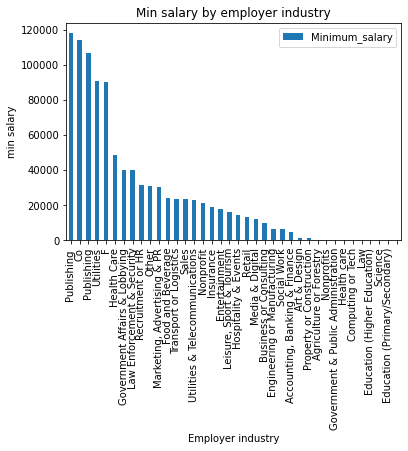

In [83]:
ax = plt.gca()
plt.ticklabel_format(style='plain') 
df2.sort_values('Minimum_salary', ascending = False).plot(kind='bar',x='Employer_industry_standardized',y='Minimum_salary',ax=ax)
plt.ylabel("min salary")
plt.xlabel("Employer industry")
plt.title("Min salary by employer industry")

In [85]:
a = df[df['Gender'] == 'Woman'].sort_values(['Salary', 'Additional_compensation'], ascending=False)
a.head(1)

,Timestamp,Age,Employer_industry_standardized,Functional_area_job,Job_title,Salary,Additional_compensation,Currency,Country,State,City,Remote_or_onsite,Yrs_experience,Yrs_in_field,Education,Gender,Race,Total_compensation
5723,2022-04-05 20:44:02,35-44,Law,Law,Legal Editor/Communications Advisor,46800000.0,300000.0,Other,South Korea,,Seoul,Hybrid,5-7 years,2-4 years,Master's degree,Woman,White,47100000.0


In [75]:
df['Education'].unique()

array(['College degree', 'Some college', "Master's degree", 'PhD',
       'High School', '', 'Professional degree (MD, JD, etc.)'],
      dtype=object)

In [84]:
b = df[(df['Gender'] == 'Man') & (df['Education'] == 'High School')].sort_values(['Salary', 'Additional_compensation'], ascending=False)
b.head(1)

,Timestamp,Age,Employer_industry_standardized,Functional_area_job,Job_title,Salary,Additional_compensation,Currency,Country,State,City,Remote_or_onsite,Yrs_experience,Yrs_in_field,Education,Gender,Race,Total_compensation
9955,2022-04-05 13:30:09,25-34,Government & Public Administration,Government & Public Administration,Project officer,384870.0,0.0,Other,Czech republic,,Prague,Hybrid,2-4 years,2-4 years,High School,Man,White,384870.0


a. The best industry for women based on salary and additonal compensation is law.


b. The best industry for men without a college education is Goverment and Public administraion.